Clustering and Dimensionality Reduction - Assignment

In [105]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [106]:
#load the Iris dataset using load_iris function from sklearn
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [107]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [108]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [109]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [110]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [111]:
#convert to DataFrame
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [112]:
df_iris['Species'] = iris.target
df_iris.head() #dataset loaded successfully

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [113]:
df_iris.shape

(150, 5)

In [114]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [115]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [116]:
#drop the species column (since this is a clustering problem)
df = df_iris.drop(columns=['Species'])

print("\nAfter dropping species column (data used for clustering):")
df.head()


After dropping species column (data used for clustering):


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [117]:
df.isnull().sum() #checking for missing values

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0


No null values found.

In [118]:
#to check for duplicate values
df.duplicated().sum()

np.int64(1)

1 duplicate row found

In [119]:
#to show all duplicate rows (based on all columns)
dup_rows = df[df.duplicated(keep=False)]
print(dup_rows)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
101                5.8               2.7                5.1               1.9
142                5.8               2.7                5.1               1.9


In [120]:
#to drop duplicate row
df.drop_duplicates(inplace=True)

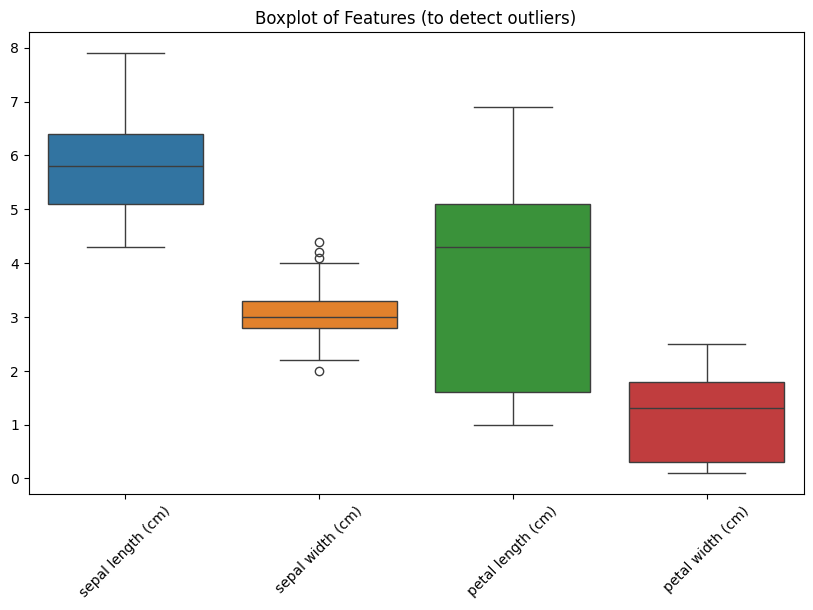

In [121]:
#Boxplots to check outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Boxplot of Features (to detect outliers)")
plt.xticks(rotation=45)
plt.show()

In [122]:
#function to count outliers column-wise
outlier_summary = {}
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    #count outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()
    outlier_summary[col] = outliers
#display outlier count
outlier_summary

{'sepal length (cm)': np.int64(0),
 'sepal width (cm)': np.int64(4),
 'petal length (cm)': np.int64(0),
 'petal width (cm)': np.int64(0)}

Ouliers found

In [123]:
Q1 = df['sepal width (cm)'].quantile(0.25)
Q3 = df['sepal width (cm)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[
    (df['sepal width (cm)'] >= lower_bound) &
    (df['sepal width (cm)'] <= upper_bound)
]

print(df.shape, df_no_outliers.shape)

(149, 4) (145, 4)


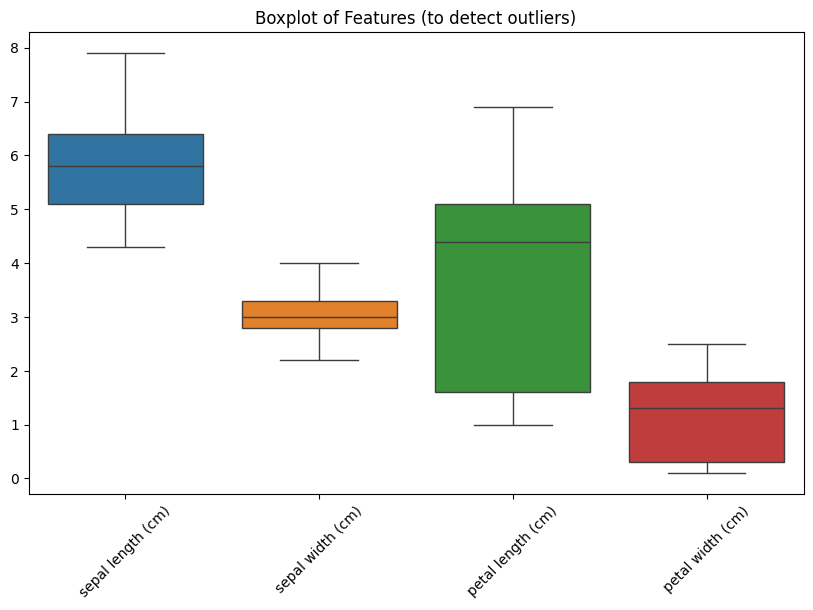

In [124]:
#Boxplots to check outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_no_outliers)
plt.title("Boxplot of Features (to detect outliers)")
plt.xticks(rotation=45)
plt.show()

In [125]:
df = df_no_outliers

In [126]:
df.skew()

,0
sepal length (cm),0.276073
sepal width (cm),0.118591
petal length (cm),-0.312221
petal width (cm),-0.133615


The skewness values for all features lie between -0.5 and 0.5, indicating that the feature distributions are approximately symmetric with only mild skewness. Therefore, no special transformation for skewness (e.g., log transformation) was applied.

KMeans Clustering

K-Means: An unsupervised learning algorithm that groups data into 'k' clusters based on similarity.
How it works:
1. Choose 'k' cluster centroids randomly.
2. Assign each data point to the nearest centroid.
3. Update centroids based on the mean of assigned points.
4. Repeat until centroids stabilize.

Why KMeans clustering might be suitable for the Iris dataset.: K-Means clustering is suitable for the Iris dataset because the features are numeric and low-dimensional, the data tends to form relatively compact and separable groups, and the natural number of clusters aligns with the algorithm’s requirement to specify K.

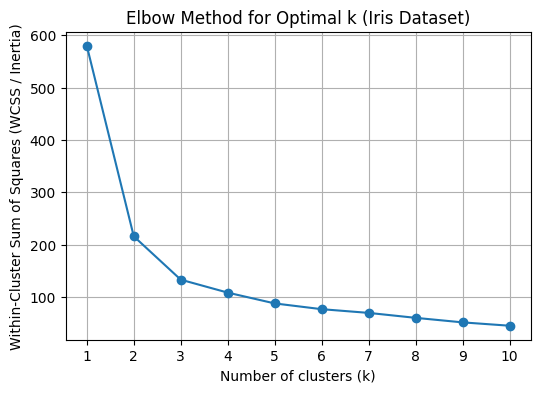

In [127]:
#features
X = df.values
#to scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#to compute WCSS (inertia_) for different values of k
wcss = []
k_values = range(1, 11)  # try k from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ = within-cluster sum of squares

#to plot the elbow graph
plt.figure(figsize=(6, 4))
plt.plot(k_values, wcss, marker='o')
plt.title("Elbow Method for Optimal k (Iris Dataset)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS / Inertia)")
plt.xticks(k_values)
plt.grid(True)
plt.show()

Using the elbow method, K was varied from 1 to 10 and the within-cluster sum of squares (WCSS) was plotted. The plot shows a clear elbow at k = 3, indicating that 3 clusters provide a good trade-off between compactness and model complexity. Therefore, k = 3 was selected for KMeans clustering on the Iris dataset.

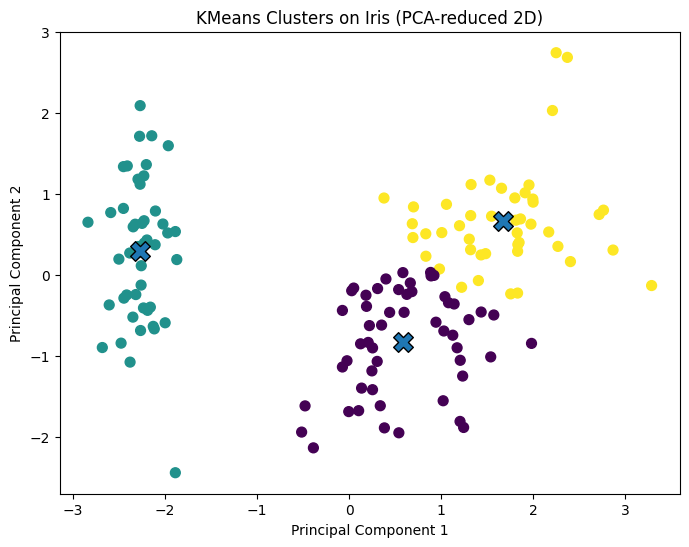

In [128]:
#KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

#to reduce to 2D using PCA for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

#to plot the clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, s=50)
plt.title("KMeans Clusters on Iris (PCA-reduced 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

#to show cluster centers in PCA space
centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], marker='X', s=200, edgecolor='black')
plt.show()

The 2D PCA visualization of the KMeans clustering (k = 3) shows three clearly separated groups, with one compact cluster on the left and two overlapping clusters on the right. The cluster centers (marked by X) lie near the middle of each group, indicating that KMeans has successfully identified meaningful structure in the Iris data, especially clearly isolating one species while partially separating the other two.

Hierarchical Clustering

Hierarchical clustering builds clusters step by step as a tree (dendrogram):
*   Agglomerative (most common): start with each point as its own cluster, then repeatedly merge the two closest clusters until one big cluster remains.
*   Divisive: start with all points in one cluster and repeatedly split.
The tree can then be cut at a chosen level to get the desired number of clusters.

Agglomerative Hierarchical clustering is suitable for the Iris dataset because:
*   The dataset is small (150 samples), so the relatively higher cost of hierarchical methods is not a problem.
*   It produces a dendrogram, which helps visually explore how Iris samples group together and at what distances clusters merge.
*   Iris forms nested, reasonably well-separated groups, so hierarchical clustering can reveal the natural structure and let us choose the number of clusters (e.g., 3) by cutting the dendrogram at an appropriate level.

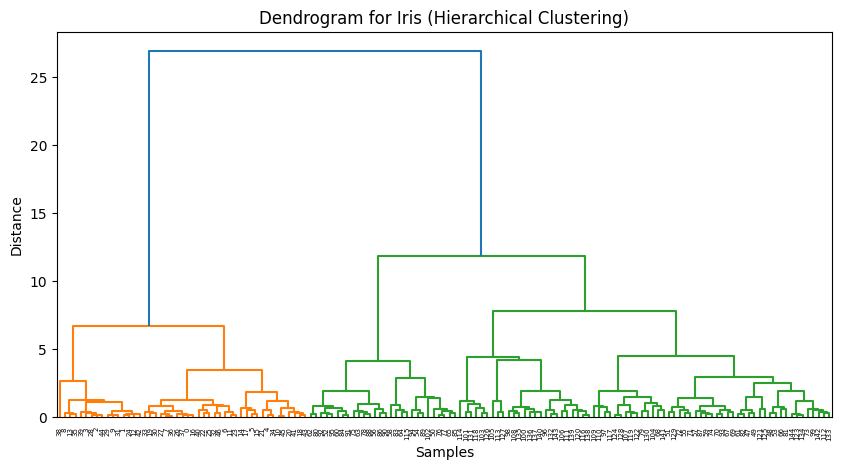

In [129]:
#dendrogram (to see hierarchy)
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Dendrogram for Iris (Hierarchical Clustering)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

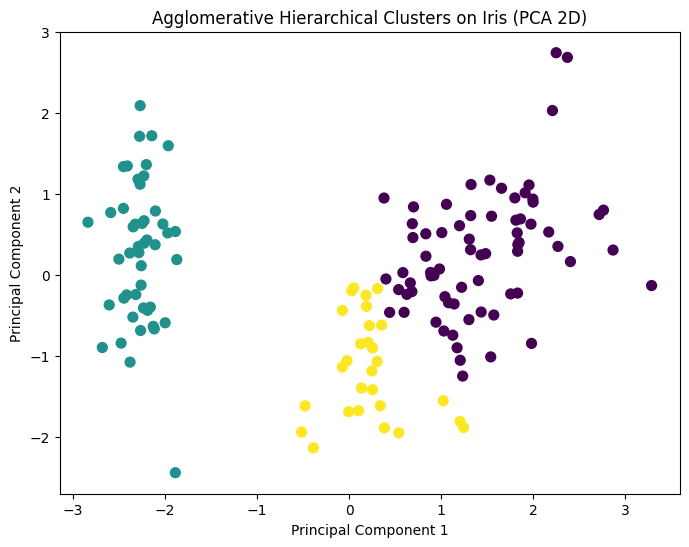

In [130]:
#agglomerative clustering
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
hc_labels = hc.fit_predict(X_scaled)

#PCA to 2D for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hc_labels, s=50)
plt.title("Agglomerative Hierarchical Clusters on Iris (PCA 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

The 2D PCA scatter plot of the Agglomerative Hierarchical clustering results shows three well-separated clusters. One cluster (left side) corresponds clearly to one Iris species, while the other two clusters (right side) capture the variation between the remaining species. This indicates that hierarchical clustering is able to discover meaningful structure in the Iris dataset.